Rotated checkerboard dataset. Rotating 2*PI.
100 batches of 1900 instances



METHOD: Static lp as classifier
Execution time:  3.7658312286394806
Average MCC:  0.00185525853742
Average macro-F1: 0.4983129877629302
Average Accuracy:  48.9235
Standard Deviation:  11.3520104277
Variance:  128.86814075


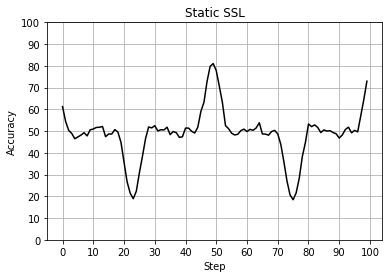

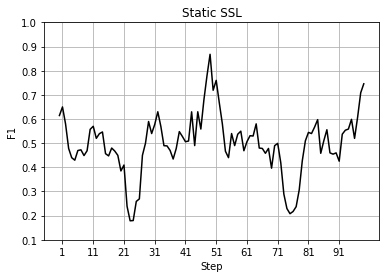




METHOD: Sliding lp as classifier
Execution time:  3.251840298477391
Average MCC:  -0.0111708823307
Average macro-F1: 0.4901910042441561
Average Accuracy:  50.0426
Standard Deviation:  3.06750016137
Variance:  9.40955724


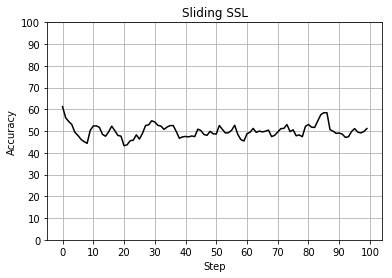

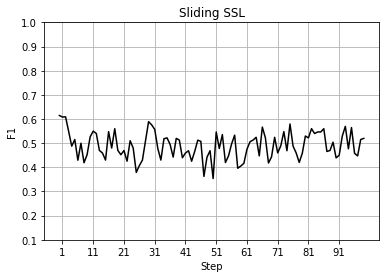




METHOD: Incremental lp as classifier
Execution time:  99.51242332336592
Average MCC:  -0.00321640220168
Average macro-F1: 0.49576909976117756
Average Accuracy:  49.0136
Standard Deviation:  11.4778020126
Variance:  131.73993904


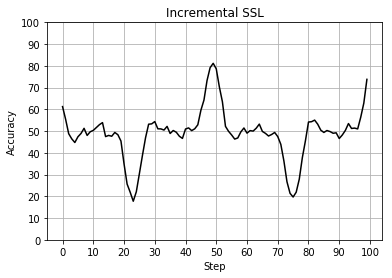

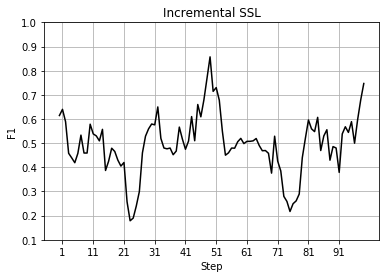




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  28.634665838616286
Average MCC:  -0.0251907417191
Average macro-F1: 0.4841799702266123
Average Accuracy:  49.89
Standard Deviation:  3.49361503317
Variance:  12.205346


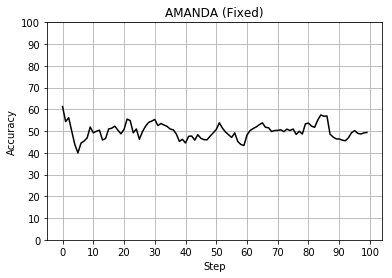

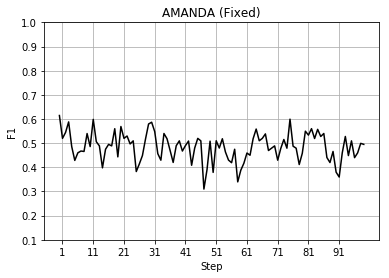




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  28.63550179022434
Average MCC:  0.0047145465023
Average macro-F1: 0.49852126753880177
Average Accuracy:  50.0205
Standard Deviation:  2.73376091676
Variance:  7.47344875


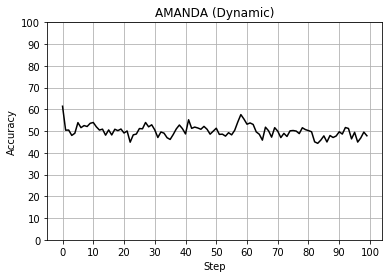

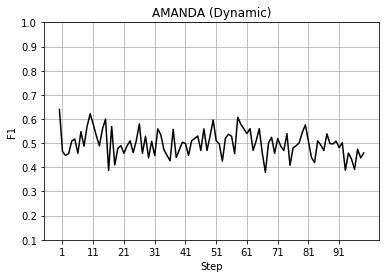




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  47.23013795176843
Average MCC:  -0.00137162282337
Average macro-F1: 0.4956789592348856
Average Accuracy:  50.2795
Standard Deviation:  2.97162661685
Variance:  8.83056475


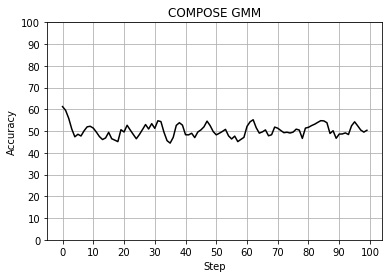

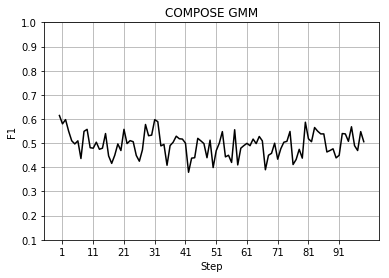

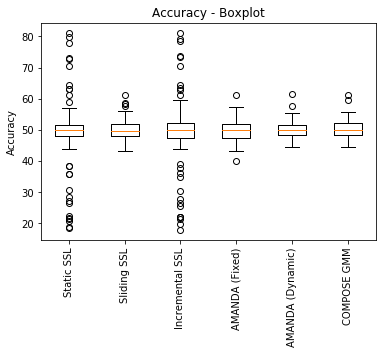

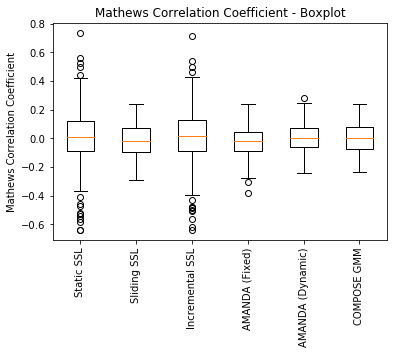

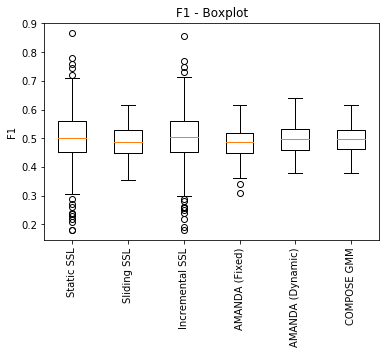

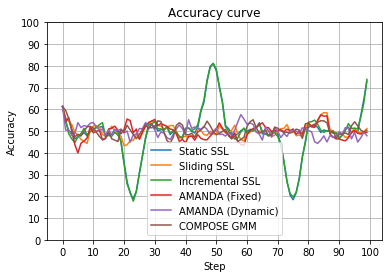

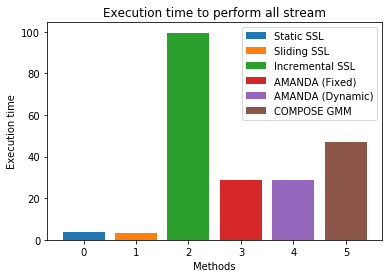

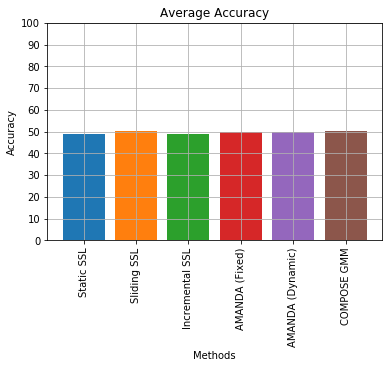

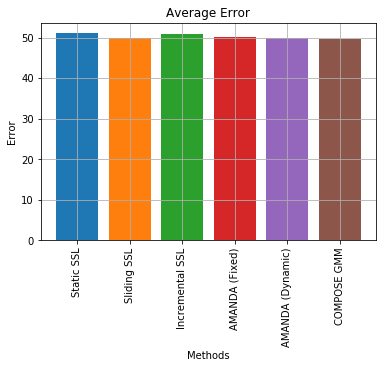

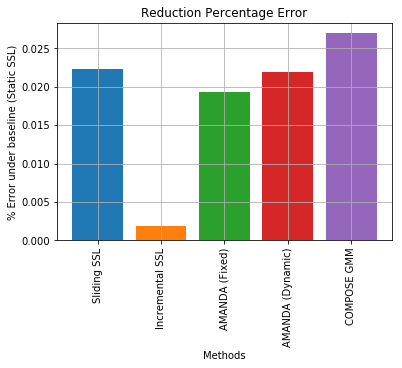

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadCheckerBoard(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 5, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 5, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 5, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 5, 0.7, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 11, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 5)
    
    # levelIw matlab results
    #predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '1CHT', steps)
    #externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()